In [2]:
## Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('max_columns',None)

In [3]:
## we saw that MTL didn't have any midfielder in the high quantity high quality quadrant in 2019
## we want to improve the ability of the team to create more and better scoring  chances through key passes
## to this end, we're going to try to recruit players (attacking midfielders) that create more high quality opportunities 

In [4]:
## load players xG data set in open play (fastbreak + regular) (see data_spec.txt)
players_xg = pd.read_csv('../data/players_xG1.csv')
## load players xPass data set in the attacking third (see data_spec.txt)
players_xp = pd.read_csv('../data/players_xP6.csv')

In [5]:
players_xg.columns

Index(['Player', 'Team', 'Season', 'MinutesIncludes stoppage time.', 'Shots',
       'SoTShots on Target', 'GGoals', 'xGxGoals',
       'xPlaceDifference between post- and pre-shot xG models.', 'G-xG',
       'KeyPKey Passes', 'APrimary Assists', 'xAxAssists', 'A-xA', 'xG+xA',
       'PAExpected points added through scoring goals.',
       'xPAExpected points added through taking shots.'],
      dtype='object')

In [6]:
players_xg = players_xg.rename(columns={'MinutesIncludes stoppage time.':'Minutes','SoTShots on Target':'SoTShots','xPlaceDifference between post- and pre-shot xG models.':'xPlaceDifference','KeyPKey Passes':'KeyPKey','APrimary Assists':'APrimary','PAExpected points added through scoring goals.':'PAExpected','xPAExpected points added through taking shots.':'xPAExpected'})

In [7]:
players_xg.columns

Index(['Player', 'Team', 'Season', 'Minutes', 'Shots', 'SoTShots', 'GGoals',
       'xGxGoals', 'xPlaceDifference', 'G-xG', 'KeyPKey', 'APrimary',
       'xAxAssists', 'A-xA', 'xG+xA', 'PAExpected', 'xPAExpected'],
      dtype='object')

In [8]:
players_xp.columns

Index(['Player', 'Team', 'Season', 'MinutesIncludes stoppage time.', 'Passes',
       'Pass %Pass Completion', 'xPass %Expected pass completion percentage.',
       'ScoreNumber of passes completed over/under expected.',
       'Per100Passes completed over/under expected, measured per 100 passes.',
       'DistanceAverage distance of completed passes, measured in yards. Assumes 115x80 field dimensions.',
       'VerticalAverage vertical distance of completed passes, measured in yards. Assumes 115x80 field dimensions.',
       'Touch %Players' share of their team's number of touches.'],
      dtype='object')

In [9]:
players_xp = players_xp.rename(columns={'MinutesIncludes stoppage time.':'Minutes','Pass %Pass Completion':'%Pass','xPass %Expected pass completion percentage.':'%ExpectedPass','ScoreNumber of passes completed over/under expected.':'Score','Per100Passes completed over/under expected, measured per 100 passes.':'Per100Passes','DistanceAverage distance of completed passes, measured in yards. Assumes 115x80 field dimensions.':'DistanceAverage','VerticalAverage vertical distance of completed passes, measured in yards. Assumes 115x80 field dimensions.':'VerticalAverage',"Touch %Players' share of their team's number of touches.":'Touch %Players'})

In [10]:
players_xp.columns

Index(['Player', 'Team', 'Season', 'Minutes', 'Passes', '%Pass',
       '%ExpectedPass', 'Score', 'Per100Passes', 'DistanceAverage',
       'VerticalAverage', 'Touch %Players'],
      dtype='object')

In [11]:
players = pd.merge(players_xp,players_xg,how='left',on=['Player', 'Team', 'Season', 'Minutes'])

In [12]:
players.isnull().sum()

Player                0
Team                  0
Season                0
Minutes               0
Passes                0
%Pass                 0
%ExpectedPass         0
Score                 0
Per100Passes          0
DistanceAverage       0
VerticalAverage       0
Touch %Players        0
Shots               492
SoTShots            492
GGoals              492
xGxGoals            492
xPlaceDifference    492
G-xG                492
KeyPKey             492
APrimary            492
xAxAssists          492
A-xA                492
xG+xA               492
PAExpected          492
xPAExpected         492
dtype: int64

In [13]:
players = players.dropna()

In [14]:
players.isnull().sum()

Player              0
Team                0
Season              0
Minutes             0
Passes              0
%Pass               0
%ExpectedPass       0
Score               0
Per100Passes        0
DistanceAverage     0
VerticalAverage     0
Touch %Players      0
Shots               0
SoTShots            0
GGoals              0
xGxGoals            0
xPlaceDifference    0
G-xG                0
KeyPKey             0
APrimary            0
xAxAssists          0
A-xA                0
xG+xA               0
PAExpected          0
xPAExpected         0
dtype: int64

In [15]:
players_salaries = pd.read_csv('../data/players_salaries.csv')

In [16]:
players = pd.merge(players,players_salaries,how='left',on=['Player','Team','Season'])

In [17]:
players.isnull().sum()

Player                       0
Team                         0
Season                       0
Minutes                      0
Passes                       0
%Pass                        0
%ExpectedPass                0
Score                        0
Per100Passes                 0
DistanceAverage              0
VerticalAverage              0
Touch %Players               0
Shots                        0
SoTShots                     0
GGoals                       0
xGxGoals                     0
xPlaceDifference             0
G-xG                         0
KeyPKey                      0
APrimary                     0
xAxAssists                   0
A-xA                         0
xG+xA                        0
PAExpected                   0
xPAExpected                  0
Position                   288
Base Salary                288
Guaranteed Compensation    288
Date                       288
dtype: int64

In [18]:
players = players.dropna()

In [19]:
players.isnull().any().sum()

0

In [20]:
players_M_2019 = players[(players['Minutes']>680)&(players['Season']==2019)&(players['Position']=='M')]

In [21]:
## we adjust the variables to show per 90 minutes values
players_M_2019['KeyP_p90'] = players_M_2019['KeyPKey'] / players_M_2019['Minutes'] * 90
players_M_2019['xA_p90'] = players_M_2019['xAxAssists'] / players_M_2019['Minutes'] * 90
players_M_2019['xA/KeyP'] = players_M_2019['xA_p90'] / players_M_2019['KeyP_p90']

In [22]:
players_M_2019.columns

Index(['Player', 'Team', 'Season', 'Minutes', 'Passes', '%Pass',
       '%ExpectedPass', 'Score', 'Per100Passes', 'DistanceAverage',
       'VerticalAverage', 'Touch %Players', 'Shots', 'SoTShots', 'GGoals',
       'xGxGoals', 'xPlaceDifference', 'G-xG', 'KeyPKey', 'APrimary',
       'xAxAssists', 'A-xA', 'xG+xA', 'PAExpected', 'xPAExpected', 'Position',
       'Base Salary', 'Guaranteed Compensation', 'Date', 'KeyP_p90', 'xA_p90',
       'xA/KeyP'],
      dtype='object')

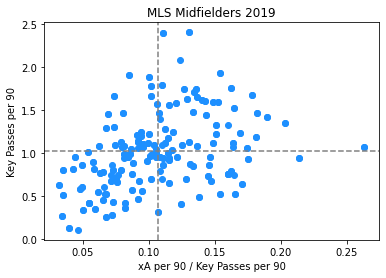

In [23]:
## this is the universe of midfielders in the MLS in 2019 
fig, ax = plt.subplots()
scatter = ax.scatter(players_M_2019['xA/KeyP'],players_M_2019['KeyP_p90'],c='dodgerblue')
ax.axhline(y=players_M_2019['KeyP_p90'].mean(), color='gray', linestyle='--')
ax.axvline(x=players_M_2019['xA/KeyP'].mean(), color='gray', linestyle='--')
plt.title('MLS Midfielders 2019')
plt.xlabel('xA per 90 / Key Passes per 90')
plt.ylabel('Key Passes per 90')
plt.show()

In [24]:
players_M_2019 = players_M_2019.drop(['Date'],1)
players_M_2019 = players_M_2019.drop_duplicates()

In [25]:
players_M_2019.head()

,Player,Team,Season,Minutes,Passes,%Pass,%ExpectedPass,Score,Per100Passes,DistanceAverage,VerticalAverage,Touch %Players,Shots,SoTShots,GGoals,xGxGoals,xPlaceDifference,G-xG,KeyPKey,APrimary,xAxAssists,A-xA,xG+xA,PAExpected,xPAExpected,Position,Base Salary,Guaranteed Compensation,KeyP_p90,xA_p90,xA/KeyP
9,Haris Medunjanin,PHI,2019,3374,553,0.6980,0.6422,30.8358,5.5761,25.2778,6.2682,0.0983,18.0,3.0,0.0,0.4939,-0.3346,-0.4939,33.0,3.0,2.9098,0.0902,3.4037,0.0000,0.3492,M,550008.0,595008.0,0.880261,0.077618,0.088176
11,Magnus Eriksson,SJE,2019,3061,833,0.7311,0.6942,30.7077,3.6864,18.0544,2.0492,0.1838,70.0,16.0,5.0,4.3696,-1.6931,0.6304,65.0,6.0,5.5407,0.4593,9.9103,2.1625,2.1851,M,450000.0,450000.0,1.911140,0.162909,0.085242
15,Ilsinho,PHI,2019,1230,384,0.8411,0.7629,30.0289,7.8200,14.8132,-0.5436,0.1029,17.0,8.0,4.0,1.6270,1.3490,2.3730,24.0,5.0,3.8933,1.1067,5.5202,2.0387,0.8278,M,330000.0,357000.0,1.756098,0.284876,0.162221
17,Jamiro Monteiro,PHI,2019,2249,464,0.8017,0.7410,28.1548,6.0678,16.5179,3.6832,0.1221,34.0,17.0,2.0,3.9755,-0.3513,-1.9755,28.0,5.0,4.1563,0.8437,8.1318,1.3899,2.3993,M,618000.0,671200.0,1.120498,0.166326,0.148439
18,Jamiro Monteiro,PHI,2019,2249,464,0.8017,0.7410,28.1548,6.0678,16.5179,3.6832,0.1221,34.0,17.0,2.0,3.9755,-0.3513,-1.9755,28.0,5.0,4.1563,0.8437,8.1318,1.3899,2.3993,M,516000.0,569200.0,1.120498,0.166326,0.148439


In [26]:
## some players have more than one Guaranteed Compensation a year 
## we take the average of these values
players_M_2019 = players_M_2019.groupby(['Player','Team']).mean().reset_index()

In [27]:
players_M_2019[players_M_2019['Player']=='Jamiro Monteiro']

,Player,Team,Season,Minutes,Passes,%Pass,%ExpectedPass,Score,Per100Passes,DistanceAverage,VerticalAverage,Touch %Players,Shots,SoTShots,GGoals,xGxGoals,xPlaceDifference,G-xG,KeyPKey,APrimary,xAxAssists,A-xA,xG+xA,PAExpected,xPAExpected,Base Salary,Guaranteed Compensation,KeyP_p90,xA_p90,xA/KeyP
75,Jamiro Monteiro,PHI,2019,2249,464,0.8017,0.741,28.1548,6.0678,16.5179,3.6832,0.1221,34.0,17.0,2.0,3.9755,-0.3513,-1.9755,28.0,5.0,4.1563,0.8437,8.1318,1.3899,2.3993,567000.0,620200.0,1.120498,0.166326,0.148439


In [28]:
players_M_2019.shape

(158, 30)

In [29]:
## in order to identify the best AMs to recruit, we're going to create 2 new variables "index_KeyP_p90" and "index_xA/KeyP"
## these variables reflect the strength of every player relative to the rest regarding the  quantity and quality of key passes
## they take values from 0 to 1 (the higher the value the better)
players_M_2019['index_KeyP_p90'] = players_M_2019['KeyP_p90']/players_M_2019['KeyP_p90'].max()
players_M_2019['index_xA/KeyP'] = players_M_2019['xA/KeyP']/players_M_2019['xA/KeyP'].max()
## finally we calculate the variable "index" as an average of both variables
players_M_2019['index'] = (players_M_2019['index_KeyP_p90']+players_M_2019['index_xA/KeyP'])/2
## this variable gives us the final measurment of all AMs regarding their ability to produce key passes, in quantity and quality 

In [30]:
## let's see the top 3 candidates
players_M_2019.sort_values('index',ascending=False)[['Player','Team','Season','KeyP_p90','xA_p90','xA/KeyP','index_KeyP_p90','index_xA/KeyP','index','Guaranteed Compensation']].head(3)

,Player,Team,Season,KeyP_p90,xA_p90,xA/KeyP,index_KeyP_p90,index_xA/KeyP,index,Guaranteed Compensation
140,Sebastián Blanco,POR,2019,2.406069,0.314122,0.130554,1.000000,0.497026,0.748513,2114174.665
5,Aleksandar Katai,CHI,2019,1.065322,0.279829,0.262670,0.442765,1.000000,0.721382,1380333.165
109,Maximiliano Moralez,NYC,2019,2.400000,0.265313,0.110547,0.997477,0.420859,0.709168,2000000.020


In [33]:
## top 3 candidates taking into account cap constraints (guaranteed compensation < USD 400,000)
players_M_2019[players_M_2019['Guaranteed Compensation']<400000].sort_values('index',ascending=False)[['Player','Team','Season','KeyP_p90','xA_p90','xA/KeyP','index_KeyP_p90','index_xA/KeyP','index','Guaranteed Compensation']].head(3)

,Player,Team,Season,KeyP_p90,xA_p90,xA/KeyP,index_KeyP_p90,index_xA/KeyP,index,Guaranteed Compensation
69,Ilsinho,PHI,2019,1.756098,0.284876,0.162221,0.729862,0.617583,0.673722,357000.00
143,Shea Salinas,SJE,2019,2.080581,0.257166,0.123603,0.864722,0.470563,0.667642,249999.96
83,Jonathan Lewis,COL,2019,1.461929,0.266199,0.182087,0.607600,0.693217,0.650409,129250.04


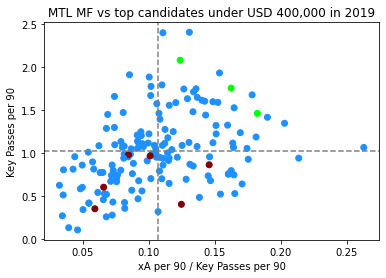

In [32]:
## MTL MFs 2019 vs top candidates < USD 400,000
players_M_2019['color'] = np.where(players_M_2019['Player'].isin(['Ilsinho','Shea Salinas','Jonathan Lewis']),'lime',np.where(players_M_2019['Team']=='MTL','maroon','dodgerblue'))
fig, ax = plt.subplots()
scatter = ax.scatter(players_M_2019['xA/KeyP'],players_M_2019['KeyP_p90'],c=players_M_2019['color'])
ax.axhline(y=players_M_2019['KeyP_p90'].mean(), color='gray', linestyle='--')
ax.axvline(x=players_M_2019['xA/KeyP'].mean(), color='gray', linestyle='--')
plt.title('MTL MF vs top candidates under USD 400,000 in 2019')
plt.xlabel('xA per 90 / Key Passes per 90')
plt.ylabel('Key Passes per 90')
plt.show()
## in red MTL MFs
## in green top MF candidates < USD 400,000